# **Random walking dead**

## **Description of the game**

For this random walk approach, the scenario we shall consider is that of an isolated population in a restricted spatial area (lets say in the scary playground) where the walkers cannot go beyond the area. 

### **Characters**
The two basic characters of this scenarios are **humans** and **zombies**. Humans are just normal walkers which their goal is to not get infected. Meanwhile, the zombies walk around in order to get all the humans infected. Zombies can die according to the life expectancy percentage. However, there are some walkers that have some especial attributes/abilities that can change the whole dynamic.

#### **Vampire**
Vampire is the most creature in this scenario. Rather than just infecting, vampires kills everything that is not a zombie. What is so special about this character is that the vampire has an mobility advantage, as he moves twice the steps as normal.

#### **Hunter**
Hunter goal is to protect the humans from zombies and vampires. It is the only character that can kill a vampire, so they would go in a duel (they share the same probability of executing). An important detail about hunter is that if he misses the shot against the zombies, the zombie could infect the hunter as a counter attack.

#### **Immune**
These walkers are not affected by any infection from zombies, as long as this scenario will last. However, they can be killed by the vampires.

#### **Healer**
These are the saviours of the game. Healers make the zombies turning into a human, regardless of how high is the percentage of the infection. Keep in mind that a healer could also be killed by vampire.

There is a state also called **dead**, where the walker does not move or affect in any aspect of the game.

## Libraries

In [189]:
import numpy as np
import matplotlib.pyplot as plt

from enum import Enum # Importing the enum

## Directions

In [2]:
class Direction(Enum):

    EAST = 1
    NORTH = 2
    WEST = 3
    SOUTH = 4

## Disease State

In [9]:
class DiseaseState(Enum):

    HUMAN = 0 # SUSCEPTIBLE = HUMAN
    IMMUNE = 1
    ZOMBIE = 2 #INFECTIOUS = ZOMBIE
    HEALER = 3
    DEAD = 4
    HUNTER = 5
    VAMPIRE = 6

## Random Walk Epidemic Simulator class

In [204]:
class RandomWalkEpidemicSimulator:
    """
    Class used to model the spreading of a contagious disease in a
    population of individuals with a 2D random walk.

    Each walker has a disease state which is represented by an
    integer Enum. Also, a set of integer (x, y)-coordinates are
    stored for each walker. The possible coordinates are:

        {0, 1, ..., Lx-1} in the x-direction
        {0, 1, ..., Ly-1} in the y-direction

    It is only possible to move North, South, East, or West. If a
    walker attempts to move outside of the physical domain, nothing
    happens (i.e., a "bounce-back boundary condition" is enforced).
    """
    def __init__(self,
                 population_size,
                 no_initially_infected=1,
                 no_immune=0,
                 no_hunter = 0,
                 no_vampire = 0,
                 no_healer = 0,
                 nx=50,
                 ny=50,
                 q=0.9,
                 p = 0.0,
                 k = 0.0,
                 gameshow=False):
        """
        :param population_size: The total number of people (N).
        :param no_init_infected: The number of infected people at t=0.
        :param no_immune: The number of immune people.
        :param no_hunter: The number of hunters.
        :param no_vampire: The number of vampires.
        :param no_healer: The number of healers.
        :param nx: The number of lattice nodes in the x-direction
        :param ny: The number of lattice nodes in the y-direction.
        :param q: The probability of infection (0 <= q <= 1).
        :param p: The probability of death (0 <= p <= 1).
        :param k: The probability of execution (0 <= k <= 1).
        :gameshow: It enables/disables the graph of the walkers.
        """
        self.N_ = population_size
        self.Z0_= no_initially_infected # No. of Zombies that are starting
        self.I_= no_immune # No. of Immune People
        self.H_= no_hunter # No. of Hunters
        self.V_ = no_vampire #No. of Vampires
        self.HL_ = no_healer #No. of Healers

        self.nx_= nx
        self.ny_= ny

        self.infection_probability_ = q
        self.death_probability_ = p
        self.execution_probability_ = k

        self.gameshow = gameshow


        self.Walkers_ = np.random.randint(0, [self.nx_, self.ny_], size=(self.N_, 2))
        self.Walkers_Old_ = self.Walkers_.copy() # in case any move is illegall, we have a old steps

        # First, let all walkers be in the susceptible compartment:
        self.State_ = np.full(self.N_, DiseaseState.HUMAN.value)
        # Next, change walker to be infectious:
        self.State_[0:self.Z0_] = DiseaseState.ZOMBIE.value
        # Next, change walker to be immune:
        self.State_[self.Z0_:self.Z0_ + self.I_] = DiseaseState.IMMUNE.value
        # Next, change walker to be hunter:
        self.State_[self.Z0_ + self.I_:self.Z0_ + self.I_ + self.H_] = DiseaseState.HUNTER.value
        # Next, change walker to be vampire:
        self.State_[self.Z0_ + self.I_ + self.H_:self.Z0_ + self.I_ + self.H_ + self.V_] = DiseaseState.VAMPIRE.value
        # Next, change walker to be healer:
        self.State_[self.Z0_ + self.I_ + self.H_ + self.V_:self.Z0_ + self.I_ + self.H_ + self.V_ + self.HL_] = DiseaseState.HEALER.value

        # Records
        self.record_humans = np.array([])
        self.record_zombies = np.array([])
        self.record_deads = np.array([])
        self.record_immune = np.array([])
        self.record_hunter = np.array([])
        self.record_vampire = np.array([])
        self.record_healer = np.array([])

        

    def move(self):
        """
        This function allows the walkers to change their position
        """
        
        proposed_directions=np.random.randint(0,4,size=self.N_) #The directions will be choosen randomly for all the walkers.
        
        # Directions
        move_east = (proposed_directions == Direction.EAST.value)
        move_north = (proposed_directions == Direction.NORTH.value)
        move_west = (proposed_directions == Direction.WEST.value)
        move_south = (proposed_directions == Direction.SOUTH.value)

        # This will only allow Walkers that are not dead to walk
        not_dead = (self.State_ != DiseaseState.DEAD.value)

        # This will allow the Vampires walk the twice steps as normal people
        vampire = (self.State_ == DiseaseState.VAMPIRE.value)
        not_vampire = (self.State_ != DiseaseState.VAMPIRE.value)


        self.Walkers_[move_east & not_dead & not_vampire] += [1, 0]
        self.Walkers_[move_north & not_dead & not_vampire] += [0, 1]
        self.Walkers_[move_west & not_dead & not_vampire] -= [1, 0]
        self.Walkers_[move_south & not_dead & not_vampire] -= [0, 1]

        self.Walkers_[move_east & not_dead & vampire] += [2, 0]
        self.Walkers_[move_north & not_dead & vampire] += [0, 2]
        self.Walkers_[move_west & not_dead & vampire] -= [2, 0]
        self.Walkers_[move_south & not_dead & vampire] -= [0, 2]

    def is_at_illegal_position(self):
        """
        Checks if it is out of position
        """
        wrong_x=np.logical_or(self.Walkers_[:,0]<0,self.Walkers_[:,0]>=self.nx_)
        wrong_y=np.logical_or(self.Walkers_[:,1]<0,self.Walkers_[:,1]>=self.ny_)
        wrong_xy=np.logical_or(wrong_x,wrong_y)
        self.Walkers_[wrong_xy]=self.Walkers_Old_[wrong_xy]
        
        self.Walkers_Old_=np.copy(self.Walkers_)

    


    def collide_and_heal(self):
        '''
        Calculates interaction between Zombies and Walkers (class implementation)
        '''
        Z_coord = self.Walkers_[self.State_ == DiseaseState.ZOMBIE.value]
        zombies_idx = np.where(self.State_ == DiseaseState.ZOMBIE.value)[0]

        for z_coord, z_idx in zip(Z_coord, zombies_idx): # loop over all zombies
            #print(z_idx)
            # compare x and y coordinate of one zombie and all Walkers to
            # find which are in the same place
            infected_at_same_location_xy = np.logical_and(z_coord[0]==self.Walkers_[:,0],z_coord[1]==self.Walkers_[:,1])
            
            # infected_at_same_location_xy contains a list of True/False of all
            # Walkers at the same/not the same place (both Humans and Zombies)
            # get the index to the Walkers, needed to update state (note the [0] at the end)
            id_walkers_at_same_location = np.where(infected_at_same_location_xy)[0]
            for walkers_id in id_walkers_at_same_location:
                if self.State_[walkers_id] == DiseaseState.HUMAN.value:
                    q = np.random.uniform(0, 1)
                    if q < self.infection_probability_:
                        self.State_[walkers_id] = DiseaseState.ZOMBIE.value
                elif self.State_[walkers_id] == DiseaseState.HEALER.value:
                    self.State_[z_idx] = DiseaseState.HUMAN.value


    def check_if_zombies_dies(self):
        # Find the index of the Zombies
        # Loop through it 
        zombies_idx = np.where(self.State_ == DiseaseState.ZOMBIE.value)
        for idx in zombies_idx: # loop over all zombies
                p = np.random.uniform(0, 1)
                if p < self.death_probability_:
                    self.State_[idx] = DiseaseState.DEAD.value

    def execution(self):
        '''
        Calculates interaction between Hunters/Vampires and Walkers (class implementation)
        '''
        E_coord = self.Walkers_[(self.State_ == DiseaseState.HUNTER.value) | (self.State_ == DiseaseState.VAMPIRE.value)]
        executers_idx = np.where((self.State_ == DiseaseState.HUNTER.value) | (self.State_ == DiseaseState.VAMPIRE.value))[0]

        # compare x and y coordinate of one hunter/vampire and all Walkers to
        # find which are in the same place
        for e_coord, e_idx in zip(E_coord, executers_idx):
            executers_at_same_location_xy = np.logical_and(e_coord[0]==self.Walkers_[:,0],e_coord[1]==self.Walkers_[:,1])
            
            # executers_at_same_location_xy contains a list of True/False of all
            # Walkers at the same/not the same place (both Hunters/Vampire and rest)
            # get the index to the Walkers, needed to update state (note the [0] at the end)
            id_walkers_at_same_location = np.where(executers_at_same_location_xy)[0]

            for walkers_id in id_walkers_at_same_location:

                # Hunter
                if self.State_[e_idx] == DiseaseState.HUNTER.value:
                    # Vampire in the same place
                    if self.State_[walkers_id] == DiseaseState.VAMPIRE.value:
                        hk = np.random.uniform(0, 1) # probability for Hunter
                        vk = np.random.uniform(0, 1) # probability for Vampire

                        # Whoever gets the lower rate, dies
                        if hk > vk:
                            self.State_[walkers_id] = DiseaseState.DEAD.value
                        elif hk < vk:
                            self.State_[e_idx] = DiseaseState.DEAD.value
                    
                    # Zombie at the same place
                    elif self.State_[walkers_id] == DiseaseState.ZOMBIE.value:
                        k = np.random.uniform(0, 1)
                        # the hunter targets the shot
                        if k < self.execution_probability_:
                            self.State_[walkers_id] = DiseaseState.DEAD.value
                        # the hunter misses the shot
                        else:
                            # chance for Zombie to counter attack
                            q = np.random.uniform(0, 1)
                            if q < self.infection_probability_:
                                self.State_[walkers_id] = DiseaseState.ZOMBIE.value

                    
                    # Human, Immune, Hunter and Healer get skipped
                    else:
                        pass
                
                # Vampire
                elif self.State_[e_idx] == DiseaseState.VAMPIRE.value:
                    # Hunter  in the same place
                    if self.State_[walkers_id] == DiseaseState.HUNTER.value:
                        hk = np.random.uniform(0, 1) # probability for Hunter
                        vk = np.random.uniform(0, 1) # probability for Vampire

                        # Whoever gets the lower rate, dies
                        if hk > vk:
                            self.State_[e_idx] = DiseaseState.DEAD.value
                        elif hk < vk:
                            self.State_[walkers_id] = DiseaseState.DEAD.value

                    # Human/Healer at the same place
                    elif self.State_[walkers_id] == DiseaseState.HUMAN.value or self.State_[walkers_id] == DiseaseState.HEALER.value or self.State_[walkers_id] == DiseaseState.IMMUNE.value:
                        k = np.random.uniform(0, 1)
                        if k < self.execution_probability_:
                            self.State_[walkers_id] = DiseaseState.DEAD.value

                    # Zombie, Immune and Vampire get skiped
                    else:
                        pass


                

    def game(self):
        Z_coord= self.Walkers_[self.State_== DiseaseState.ZOMBIE.value]
        H_coord= self.Walkers_[self.State_==DiseaseState.HUMAN.value]
        D_coord = self.Walkers_[self.State_==DiseaseState.DEAD.value]
        I_coord = self.Walkers_[self.State_==DiseaseState.IMMUNE.value]
        HU_coord = self.Walkers_[self.State_==DiseaseState.HUNTER.value]
        V_coord = self.Walkers_[self.State_==DiseaseState.VAMPIRE.value]
        HL_coord = self.Walkers_[self.State_==DiseaseState.HEALER.value]
        plt.scatter(Z_coord[:,0],Z_coord[:,1],s=80,c='r')
        plt.scatter(H_coord[:,0],H_coord[:,1],c='b')
        plt.scatter(D_coord[:,0],D_coord[:,1], marker='s', c='k')
        plt.scatter(I_coord[:,0],I_coord[:,1], marker='d', c='y')
        plt.scatter(HU_coord[:,0],HU_coord[:,1], marker='*', c='orange')
        plt.scatter(V_coord[:,0],V_coord[:,1], marker='p', c='purple')
        plt.scatter(HL_coord[:,0],HL_coord[:,1], marker='P', c='g')
        plt.xlim(0,self.nx_)
        plt.ylim(0,self.ny_)
        plt.grid()
        #plt.show()

    def record(self):
        no_susceptible = np.sum(self.State_ == DiseaseState.HUMAN.value)
        no_infectious = np.sum(self.State_ == DiseaseState.ZOMBIE.value)
        no_recovered = np.sum(self.State_ == DiseaseState.DEAD.value)
        no_immune = np.sum(self.State_ == DiseaseState.IMMUNE.value)
        no_hunter = np.sum(self.State_ == DiseaseState.HUNTER.value)
        no_vampire = np.sum(self.State_ == DiseaseState.VAMPIRE.value)
        no_healer = np.sum(self.State_ == DiseaseState.HEALER.value)

        self.record_humans = np.append(self.record_humans, no_susceptible)
        self.record_zombies = np.append(self.record_zombies, no_infectious)
        self.record_deads = np.append(self.record_deads, no_recovered)
        self.record_immune = np.append(self.record_immune, no_immune)
        self.record_hunter = np.append(self.record_hunter, no_hunter)
        self.record_vampire = np.append(self.record_vampire, no_vampire)
        self.record_healer = np.append(self.record_healer, no_healer)
        

    
    def run(self, steps):
        for s in range(steps):
            if self.gameshow == True:
                self.game()
            self.record()
            self.move()
            self.is_at_illegal_position()
            self.collide_and_heal()
            self.check_if_zombies_dies()
            self.execution()


    def stats(self):
        """
        It shows the statistics of humans, zombies and deaths
        """
        new_line = "\n"

        no_susceptible = np.sum(self.State_ == DiseaseState.HUMAN.value)
        no_infectious = np.sum(self.State_ == DiseaseState.ZOMBIE.value)
        no_recovered = np.sum(self.State_ == DiseaseState.DEAD.value)
        no_immune = np.sum(self.State_ == DiseaseState.IMMUNE.value)
        no_hunter = np.sum(self.State_ == DiseaseState.HUNTER.value)
        no_vampire = np.sum(self.State_ == DiseaseState.VAMPIRE.value)
        no_heal = np.sum(self.State_ == DiseaseState.HEALER.value)

        print(f"Susceptibles: {no_susceptible}{new_line}Infectious: {no_infectious}{new_line}Recovered: {no_recovered}{new_line}Immune: {no_immune}{new_line}Hunter: {no_hunter}{new_line}Vampire: {no_vampire}{new_line}Healer: {no_heal}")

# Scenarios

1 time step = 1 hour

In [242]:
day = 24
week = day * 7
month = week * 4

## Scenario 1: Headless chickens

This is a scenario where the 40 humans run away from 10 zombies. This will last 3 days

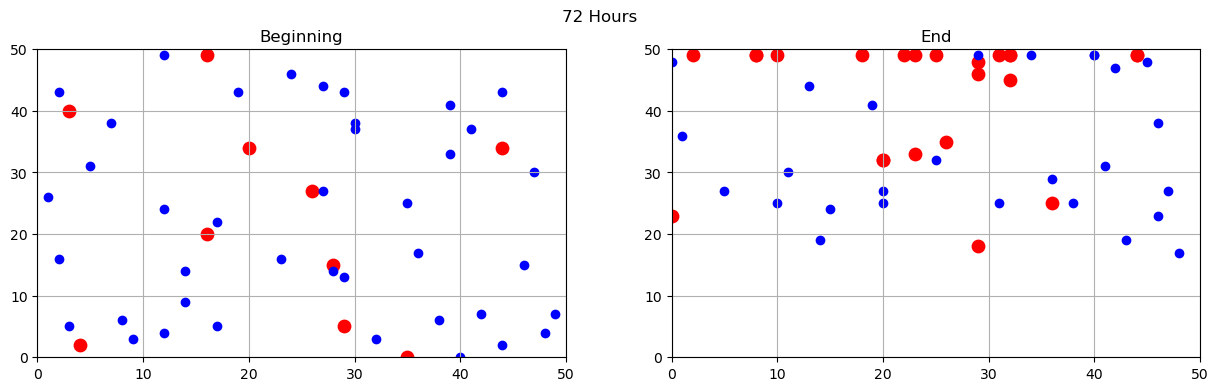

In [245]:
scenario01 = RandomWalkEpidemicSimulator(50, 10)
n = 3 * day

plt.figure(figsize=(15,4))
plt.suptitle(f"{n} Hours")

plt.subplot(1, 2, 1)
plt.title("Beginning")
scenario01.game()

scenario01.run(n)

plt.subplot(1,2,2)
plt.title("End")
scenario01.game()


In [246]:
scenario01.stats()

Susceptibles: 27
Infectious: 23
Recovered: 0
Immune: 0
Hunter: 0
Vampire: 0
Healer: 0


## Scenario 2: Disadvantage for Humans

This scenario its going to be flipped relatated to the previous on.

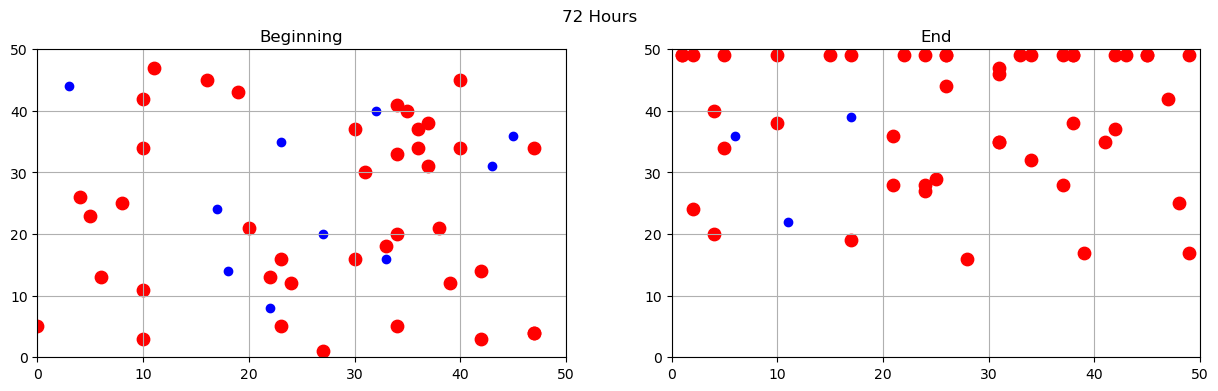

In [249]:
scenario02 = RandomWalkEpidemicSimulator(50, 40)


plt.figure(figsize=(15,4))
plt.suptitle(f"{n} Hours")

plt.subplot(1, 2, 1)
plt.title("Beginning")
scenario02.game()

scenario02.run(n)

plt.subplot(1,2,2)
plt.title("End")
scenario02.game()

In [250]:
scenario02.stats()

Susceptibles: 3
Infectious: 47
Recovered: 0
Immune: 0
Hunter: 0
Vampire: 0
Healer: 0


According to the map graph, it becomes easier for zombies to infest humans, due to the large number of zombies